In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# supressing scientific notation on this notebook and using two decimals
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Reading the CSV and storing its contents into a Data Frame
rent = pd.read_csv('rent_properties.csv', index_col=False)

In [3]:
# Filtering the data according to the distance to the nearest subway station
# estate = estate[estate['nearest_station_distance'] <= 1]

In [4]:
# Numerical and Categorical features
numerical = rent.dtypes[rent.dtypes != "object"].index
categorical = rent.dtypes[rent.dtypes == "object"].index

In [5]:
# Setting styles and colours for the graphics
sns.set_style('darkgrid')
sns.set_palette('pastel')

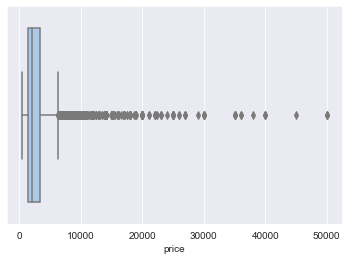

In [6]:
# Distributions of data
sns.boxplot(rent['price'])
plt.show()

In [7]:
# Broad view of data
rent.describe()

,price,condo,size,rooms,toilets,suites,parking,elevator,furnished,swimming_pool,new,latitude,longitude,nearest_station_distance
count,7228.00,7228.00,7228.00,7228.00,7228.00,7228.00,7228.00,7228.00,7228.00,7228.00,7228.00,7228.00,7228.00,7228.00
mean,3077.67,825.19,89.49,2.30,2.11,1.02,1.45,0.30,0.17,0.49,0.00,-22.03,-43.50,385.27
std,3522.83,835.62,63.98,0.83,1.00,0.88,0.89,0.46,0.38,0.50,0.03,5.96,11.68,1415.47
min,480.00,0.00,30.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,-46.75,-58.36,0.02
25%,1350.00,395.75,52.00,2.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,-23.60,-46.69,0.64
50%,2000.00,595.00,67.00,2.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,-23.56,-46.64,1.35
75%,3300.00,990.00,100.00,3.00,2.00,1.00,2.00,1.00,0.00,1.00,0.00,-23.52,-46.59,2.78
max,50000.00,9500.00,880.00,10.00,8.00,5.00,9.00,1.00,1.00,1.00,1.00,0.00,0.00,5653.93


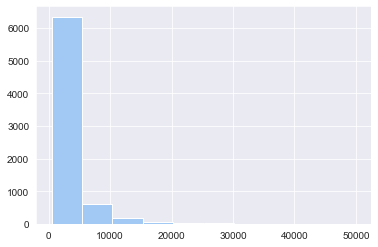

In [8]:
rent['price'].hist()

In [9]:
# Skewness and Kurtosis
skewness = rent['price'].skew()
kurtosis = rent['price'].kurt()
print(rent['price'].describe())
print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurtosis}')

count    7228.00
mean     3077.67
std      3522.83
min       480.00
25%      1350.00
50%      2000.00
75%      3300.00
max     50000.00
Name: price, dtype: float64
Skewness: 4.874126115526219
Kurtosis: 37.09065150344797


In [10]:
# Interquartile range (IQR) is a measure of statistical dispersion, 
# being equal to the difference between 75th and 25th percentiles
Q1 = rent.quantile(0.25)
Q3 = rent.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price                      1950.00
condo                       594.25
size                         48.00
rooms                         1.00
toilets                       0.00
suites                        0.00
parking                       1.00
elevator                      1.00
furnished                     0.00
swimming_pool                 1.00
new                           0.00
latitude                      0.08
longitude                     0.10
nearest_station_distance      2.14
dtype: float64


In [11]:
# What is this line doing?
rent = rent[~((rent < (Q1 - 1.5 * IQR)) | (rent > (Q3 + 1.5 * IQR))).any(axis=1)]

In [12]:
rent.describe()

,price,condo,size,rooms,toilets,suites,parking,elevator,furnished,swimming_pool,new,latitude,longitude,nearest_station_distance
count,3037.00,3037.00,3037.00,3037.00,3037.00,3037.00,3037.00,3037.00,3037.00,3037.00,3037.00,3037.00,3037.00,3037.00
mean,1921.08,557.03,69.28,2.24,2.00,1.00,1.25,0.34,0.00,0.44,0.00,-23.56,-46.63,1.70
std,933.75,355.23,24.48,0.66,0.00,0.00,0.49,0.47,0.00,0.50,0.00,0.05,0.08,1.30
min,480.00,0.00,30.00,1.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,-23.70,-46.80,0.02
25%,1250.00,350.00,52.00,2.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,-23.60,-46.69,0.66
50%,1600.00,524.00,64.00,2.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,-23.56,-46.63,1.34
75%,2399.00,732.00,79.00,3.00,2.00,1.00,1.00,1.00,0.00,1.00,0.00,-23.53,-46.58,2.40
max,6200.00,1850.00,172.00,4.00,2.00,1.00,3.00,1.00,0.00,1.00,0.00,-23.42,-46.43,5.68


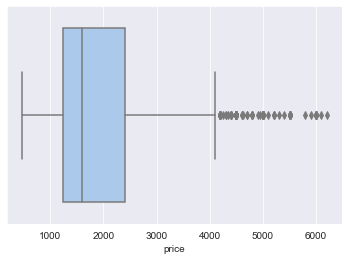

In [13]:
# Distributions of data
sns.boxplot(x=rent['price'])
plt.show()